In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras.optimizers import SGD
from keras import backend as K
img_rows,img_cols=224,224
batch_size=30
train_data_dir='E:/PD_backup/First_Predict/training'
validation_data_dir='E:/PD_backup/First_Predict/testing'
if K.image_data_format()=='channels_first':
    input_shape=(3,img_rows,img_cols)
else:
    input_shape=(img_rows,img_cols,3)   
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(img_rows,img_cols),batch_size=batch_size,class_mode='categorical')
validation_generator=test_datagen.flow_from_directory(validation_data_dir,target_size=(img_rows,img_cols),batch_size=batch_size,class_mode='categorical')

Using TensorFlow backend.


Found 4840 images belonging to 6 classes.
Found 1539 images belonging to 6 classes.


In [2]:
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
output = restnet.layers[-1].output
output = keras.layers.Flatten()(output)
restnet = Model(restnet.input, output)
for layer in restnet.layers:
    layer.trainable = True
restnet.trainable = False
restnet.summary()
# from keras import applications
# restnet = keras.applications.DenseNet121()

# # Freeze the base model
# #restnet.trainable = False    


C:\Users\AmritaChandana\.conda\envs\Insect\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


A local file was found, but it seems to be incomplete or outdated because the md5 file hash does not match the original value of a268eb855778b3df3c7506639542a6af so we will re-download the data.
94658560/94653016 [==============================] - 191s 2us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
____________________________

In [3]:
model = Sequential()
model.add(restnet)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))
sgd=SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.summary()
# model.build((None, 4))  # Create the weights

# print("weights:", len(model.weights))
# print("trainable_weights:", len(model.trainable_weights))
# print("non_trainable_weights:", len(model.non_trainable_weights))



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 100352)            23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 3078      
Total params: 75,234,182
Trainable params: 51,646,470
Non-trainable params: 23,587,712
_________________________________

In [5]:
step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,validation_data=validation_generator,
                   epochs=4,shuffle=False)
# model.fit_generator(train_generator,epochs=3,validation_data=validation_generator)

Epoch 1/4
161/161 [==============================] - 2486s 15s/step - loss: 0.4602 - accuracy: 0.8712 - val_loss: 2.4810 - val_accuracy: 0.1871
Epoch 2/4
161/161 [==============================] - 3293s 20s/step - loss: 0.0992 - accuracy: 0.9688 - val_loss: 2.4356 - val_accuracy: 0.1871
Epoch 3/4
161/161 [==============================] - 3536s 22s/step - loss: 0.0526 - accuracy: 0.9827 - val_loss: 2.2065 - val_accuracy: 0.1871
Epoch 4/4
161/161 [==============================] - 3246s 20s/step - loss: 0.0466 - accuracy: 0.9809 - val_loss: 2.6924 - val_accuracy: 0.1871


In [6]:
model.save('Resnet50_1predict.h5')

In [1]:
from keras.models import load_model
model1 = load_model('Resnet50_1predict.h5')

Using TensorFlow backend.
C:\Users\AmritaChandana\.conda\envs\Insect\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


<class 'numpy.ndarray'>
[[1.3958221e-17 1.0000000e+00 6.1116628e-13 3.2408947e-16 2.7566158e-15
  2.0494005e-17]]
Array is of type:  <class 'numpy.ndarray'>
No. of dimensions:  2
Shape of array:  (1, 6)
1.0
1
Helicoverpa


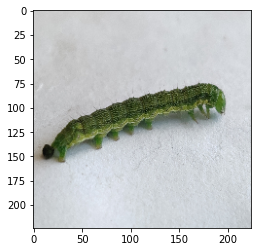

In [8]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
img_pred=image.load_img('E:/PD_backup/single_predict/Helicoverpa.jpg',target_size=(224,224))
plt.imshow(img_pred)
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)
print(type(img_pred))
#print(type(img_pred))
#print(img_pred.shape)
rslt=model1.predict(img_pred)
print (rslt)  
print("Array is of type: ", type(rslt))
print("No. of dimensions: ", rslt.ndim)
print("Shape of array: ", rslt.shape)
# print ("Largest element is:", rslt.max())
b=rslt.max()
print(b)
# if b<0.99989755:
if b<0.90 :
    print("unknown")
else:
    a=(np.argmax(model1.predict(img_pred)))
    print(a)
    print("Dysdercus") if a == 0 else print("Helicoverpa") if a == 1 else print("Helicoverpa_A") if a == 2 else print("Horn Caterpillar") if a == 3 else print("MealMoth") if a == 4 else print("Moth") if a == 5 else print("none")